All the predicted classes:  ['b' 'e' 'm' 't']
Classes in full names:  ['business', 'entertainment', 'health', 'science and technology']
Accuracy score for trained data:  0.9438718140929535
Accuracy score for test data:  0.8680659670164917
id
289974    b
170077    m
381569    e
96846     b
148554    e
         ..
377732    b
169994    e
175850    e
24921     b
234400    b
Name: category, Length: 10672, dtype: object
['b' 'm' 'e' ... 'e' 'b' 'b']


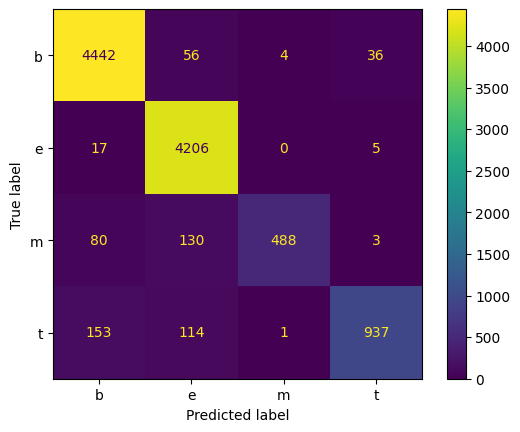

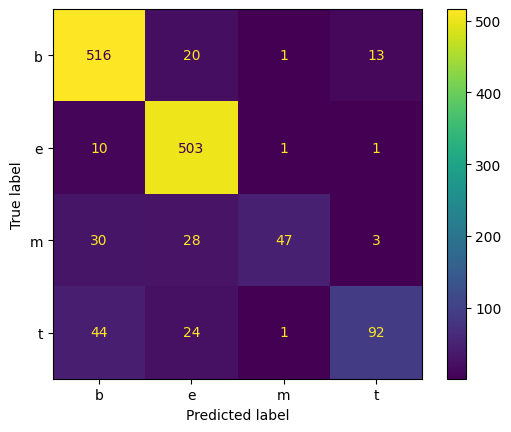

For training data: 

	 Number of business articles: 4538
	 Number of entertainment articles: 4228
	 Number of health articles: 701
	 Number of science and technology articles: 1205 

For testing data: 

	 Number of business articles: 550
	 Number of entertainment articles: 515
	 Number of health articles: 108
	 Number of science and technology articles: 161 



In [16]:
from json import load
import numpy as np
import pickle
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics

train_path = '../Data/Output/Chapter6/ex50-train.txt'
val_path = '../Data/Output/Chapter6/ex50-valid.txt'
test_path = '../Data/Output/Chapter6/ex50-test.txt'
model_path = '../Data/Output/Chapter6/model_logisticregression.pickle'

train_fe_path = train_path.replace('.txt', '_features.npy')
val_fe_path = val_path.replace('.txt', '_features.npy')
test_fe_path = test_path.replace('.txt', '_features.npy')

df_train = pd.read_csv(train_path, sep='\t', header=0, index_col='id')
df_valid = pd.read_csv(val_path, sep='\t', header=0, index_col='id')
df_test = pd.read_csv(test_path, sep='\t', header=0, index_col='id')

classes_fullNames = ["business", "entertainment","health", "science and technology"]


def get_feature_datas(train_fe_path, val_fe_path, test_fe_path):
    x_train = np.load(train_fe_path, allow_pickle=True)
    x_valid = np.load(val_fe_path, allow_pickle=True)
    x_test = np.load(test_fe_path, allow_pickle=True)
    return x_train, x_valid, x_test


def get_labels() -> pd.DataFrame:
    # le = preprocessing.LabelEncoder()
    # le.fit(df_train['category'])
    # y = le.transform(df_train['category'])
    # return y
    y_train = df_train["category"]
    y_valid = df_valid["category"]
    y_test = df_test["category"]

    return y_train, y_valid, y_test


x_train, x_valid, x_test = get_feature_datas(train_fe_path, val_fe_path, test_fe_path)
y_train, y_valid, y_test = get_labels()

loaded_model = pickle.load(open(model_path, 'rb'))
print("All the predicted classes: ", loaded_model.classes_)
print("Classes in full names: ", classes_fullNames)
y_pred_train = loaded_model.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
y_pred_test = loaded_model.predict(x_test)
test_score = accuracy_score(y_test, y_pred_test)

print("Accuracy score for trained data: ", train_score)
print("Accuracy score for test data: ", test_score)

print(y_train)
print(y_pred_train)


def draw_confusion_matrix(y_true, y_pred):
    confusion_matrix_train = metrics.confusion_matrix(y_true, y_pred)
    cm_display_train = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix_train, display_labels=['b', 'e', 'm', 't'])

    cm_display_train.plot()
    plt.show()

def count_by_category(df, datatype:str):
    count_business = df[df["category"] == 'b'].shape[0]
    count_entertain = df[df["category"] == 'e'].shape[0]
    count_health = df[df["category"] == 'm'].shape[0]
    count_scitech = df[df["category"] == 't'].shape[0]
    
    print("For {} data: \n".format(datatype))
    print("\t Number of business articles:", count_business)
    print("\t Number of entertainment articles:", count_entertain)
    print("\t Number of health articles:", count_health)
    print("\t Number of science and technology articles:", count_scitech,"\n")

draw_confusion_matrix(y_train, y_pred_train)
draw_confusion_matrix(y_test, y_pred_test)

count_by_category(df_train, "training")
count_by_category(df_test, "testing")

# print(df_train.value_counts())